### A/B Test Analysis: Jupyter Notebook Version

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, ttest_ind

In [42]:
# Set seed for reproducibility
np.random.seed(42)

In [43]:
# Simulate A/B test data
n_control = 1000
n_variant = 1000

In [44]:
# Conversion rates
p_control = 0.12  # 12% baseline conversion
p_variant = 0.145  # 14.5% conversion for variant

In [45]:
# Simulate conversions (1 = converted, 0 = not)
control_group = np.random.binomial(1, p_control, n_control)
variant_group = np.random.binomial(1, p_variant, n_variant)

In [46]:
# Create DataFrame
ab_data = pd.DataFrame({
    'group': ['control'] * n_control + ['variant'] * n_variant,
    'converted': np.concatenate([control_group, variant_group])
})

In [47]:
# Calculate conversion rates
conversion_rates = ab_data.groupby('group')['converted'].mean().reset_index()

In [48]:
# Perform t-test
t_stat, p_val = ttest_ind(control_group, variant_group)

In [49]:
# Prepare data for visualization
summary = conversion_rates.copy()
summary['count'] = ab_data.groupby('group')['converted'].count().values
summary['std_err'] = ab_data.groupby('group')['converted'].std().values / np.sqrt(summary['count'])

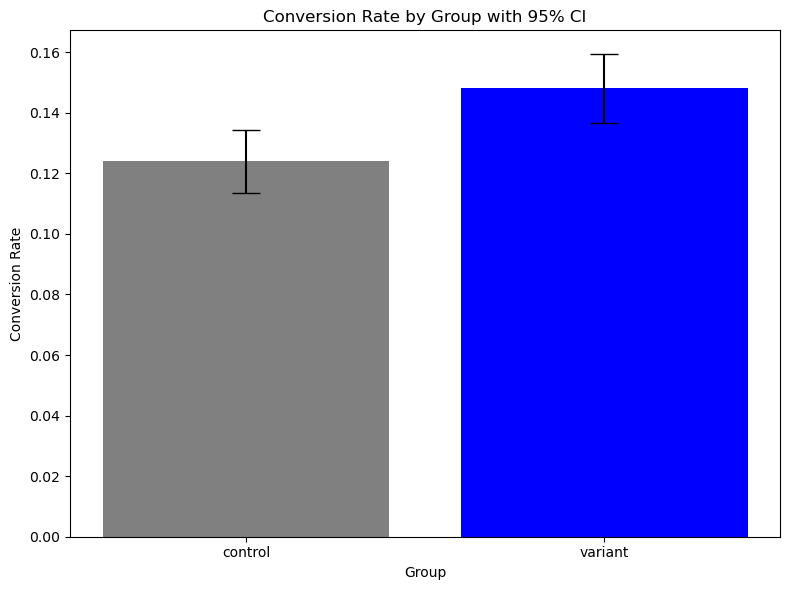

In [50]:
# Plot conversion rates with error bars using matplotlib
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(summary['group'], summary['converted'], yerr=summary['std_err'], capsize=10, color=['gray', 'blue'])
ax.set_title('Conversion Rate by Group with 95% CI')
ax.set_ylabel('Conversion Rate')
ax.set_xlabel('Group')
plt.tight_layout()
plt.show()

In [51]:
# Display summary stats in notebook
print("A/B Test Summary:")
display(summary.head())

A/B Test Summary:


,group,converted,count,std_err
0,control,0.124,1000,0.010427
1,variant,0.148,1000,0.011235


In [52]:
# Output test statistics for inclusion in notebook
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_val:.4f}")
print("\nA/B Test Summary:")
print(summary[['group', 'converted', 'count', 'std_err']].head())

T-statistic: -1.5657
P-value: 0.1176

A/B Test Summary:
     group  converted  count   std_err
0  control      0.124   1000  0.010427
1  variant      0.148   1000  0.011235


In [53]:
# Interpretation block
print("\nInterpretation:")
if p_val < 0.05:
    print("The difference in conversion rates is statistically significant. The variant likely performs better.")
else:
    print("The difference is NOT statistically significant. We cannot conclude the variant is better.")


Interpretation:
The difference is NOT statistically significant. We cannot conclude the variant is better.
